# You Do Session 1 
- Importing Libraries and the data

In [174]:
import numpy as np
import streamlit as st
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import fetch_california_housing
import plotly.graph_objects as go

In [175]:
cal_housing = fetch_california_housing()
X = pd.DataFrame(cal_housing.data, columns=cal_housing.feature_names)
y = cal_housing.target

df = pd.DataFrame(
    dict(MedInc=X['MedInc'], Price=cal_housing.target, ))

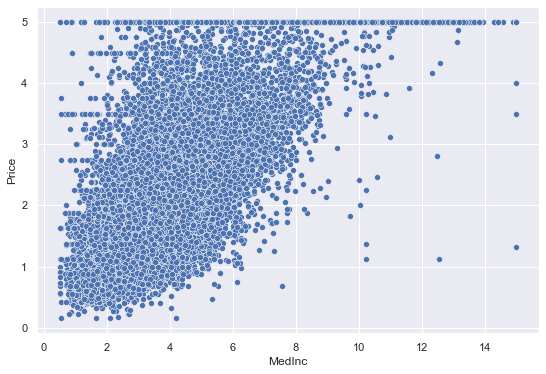

In [3]:
sns.set(rc={'figure.figsize':(9,6)})
fig = sns.scatterplot( x=df["MedInc"], y=df["Price"])
plt.show()

### Let's create our model, our loss functions
- Since the relation between Medium Income and Price seems mostly linear, I am going to keep it simple. So our model $$ y = \beta_0 + \beta_1 x = {\beta} ^T x $$
- We can model our loss function as follows
    - Since we want our loss function to penalize the model same after some threshold, we might have used the model below.
    
    -  $$ L(\beta_0,\beta_1) = \left\{ \begin{array}{cl}
(y - (\beta_0 + \beta_1x))^2 & : \ (y-(\beta_0 + \beta_1x))^2 \le  C \\
C & : \ o / w
\end{array} \right .  $$
    - However, derivatives of the loss function is also important. If we use the model above, we might end up with not updating the beta values since the derivative of a constant is zero. 
    - Therefore, I am going to use a exponentially decaying function where the losses are increasing but in a decaying way. Our model will be : 
    
    - $$ L(\beta_0,\beta_1) = C (1- e^{-K(y-(\beta_0 + \beta_1x))^2}) $$ 
    
    - For parameters K and C, I am going to decide with cross validation score of the model and tune it. But for simplicty, K represents how fast my function should increase for some point and C will represent my threshold. 
    - To show the convexity of the function, we can check the plot. As we can see from the contour lines, it is convex.   

In [176]:
def loss_function(y,x, b0,b1):
    y_pred  = b0 + b1 * x
    error = (y- y_pred)**2
    K = 0.001
    C = 30
    return C*(1-np.exp(-K*error)).sum()
            

In [177]:
x = df['MedInc']
y = df['Price']
b0 = np.linspace(-25, 25, 100)
b1 = np.linspace(-25, 25, 100)

for i, _b0 in enumerate(b0):
    for j, _b1 in enumerate(b1):
            loss[i][j] =  loss_function(y[:100],x[:100],_b0,_b1)
        



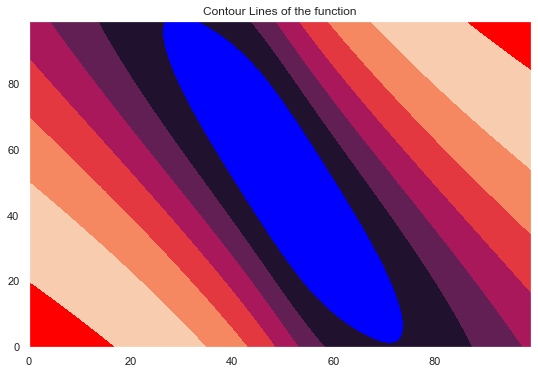

In [216]:
cs = plt.contourf(loss,  extend='both')
plt.title('Contour Lines of the function')
cs.changed();

### Let's define the gradients of the function and the gradient descent algorithm now
- Now that we checked our convexity of our function, we can define our gradient functions. 
- The derivative of the loss function with respect to Beta values can be found here : 
    - $$ \frac{\partial L}{\partial \beta_0} = 2K\cdot\left({\beta}_0-y+{\beta}_1x\right)\mathrm{e}^{-K\cdot\left(-{\beta}_0+y-{\beta}_1x\right)^2}$$
    
    - $$ \frac{\partial L}{\partial \beta_1} = 2Kx\cdot\left(x{\beta}_1-y+{\beta}_0\right)\mathrm{e}^{-K\cdot\left(-x{\beta}_1+y-{\beta}_0\right)^2} $$ 

In [179]:
def grad(y,x,b0,b1):
    K = 0.001
    C = 50
    g_b0 = (2 * K * (b0 - y+(b1*x)) * np.exp(-K * (-b0+y-(b1*x))**2)).sum()
    g_b1 = (2* K * x * ((x*b1) - y+b0) * np.exp(-K *((-x*b1) + y-b0)**2)).sum()
    return g_b0, g_b1

In [180]:
def lm(y,x,alpha):
    beta = np.random.randn(2)
    loss = []
    for it in range(10000):
        
        # getting gradients
        
        y_pred = beta[0] + beta[1] * x
        g_b0, g_b1 = grad(y,x,beta[0],beta[1])
        if(it%100 == 0): 
            print(f"({it}) beta: {beta}, gradient: {g_b0} {g_b1}")
        
        # updating gradients
        
        beta_prev = np.copy(beta)
        beta[0] = beta[0] - alpha * g_b0
        beta[1] = beta[1] - alpha * g_b1
        
        #early stopping 
        
        if np.linalg.norm(beta - beta_prev) < 0.000001:
            print(f"I do early stoping at iteration {it}")
            break
    print(f'Loss  : {loss_function(y,x, beta[0],beta[1])}')
    return beta

In [219]:
beta = lm(y,x,0.001)

(0) beta: [-1.16683274 -0.73961074], gradient: -238.15836414855255 -1061.719662413699
(100) beta: [-0.15865517  0.54606944], gradient: -4.65392561722415 0.9795525973212835
(200) beta: [0.16747791 0.47743877], gradient: -2.159374822523964 0.45433256448165826
(300) beta: [0.31875169 0.44561289], gradient: -1.001311752803378 0.21064853692486762
(400) beta: [0.38889031 0.43085803], gradient: -0.46421305009189595 0.09765269142116484
(500) beta: [0.42140554 0.42401814], gradient: -0.21519330803943737 0.04526746565719941
(600) beta: [0.43647822 0.42084751], gradient: -0.09975269267399911 0.02098349621978368
(700) beta: [0.44346509 0.41937779], gradient: -0.0462395491541755 0.009726686300583598
(800) beta: [0.44670379 0.41869651], gradient: -0.021433812162176213 0.004508684691240106
(900) beta: [0.44820504 0.41838072], gradient: -0.009935364649353406 0.0020899401629281833
(1000) beta: [0.44890093 0.41823434], gradient: -0.004605401927370245 0.0009687626633376745
(1100) beta: [0.4492235  0.4181

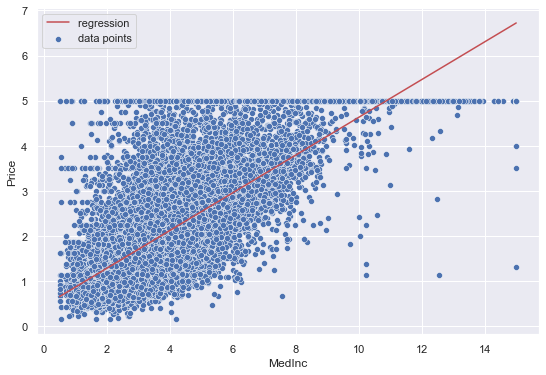

In [222]:
sns.scatterplot(x=x, y=y, label='data points')
sns.lineplot(x=x, y=beta[0] + beta[1] * x, label='regression ', color = 'r')
plt.show()

- Now that we have a fitted regression line, we can change it to the L2 regularized version. 

In [183]:
def lm_l2(y,x,alpha,lam):
    beta = np.random.randn(2)
    loss = []
    for it in range(10000):
        
        # getting gradients
        
        y_pred = beta[0] + beta[1] * x
        g_b0, g_b1 = grad(y,x,beta[0],beta[1])
        
        # Adding regularization terms 
        
        g_b0 = g_b0 + 2 * lam * beta[0]
        g_b1 = g_b1 + 2 * lam * beta[1]
        
        if(it%100 == 0): 
            print(f"({it}) beta: {beta}, gradient: {g_b0} {g_b1}")
        
        # updating gradients
        
        beta_prev = np.copy(beta)
        beta[0] = beta[0] - alpha * g_b0 
        beta[1] = beta[1] - alpha * g_b1 
        
        #early stopping 
        
        if np.linalg.norm(beta - beta_prev) < 0.000001:
            print(f"I do early stoping at iteration {it}")
            break
    print(f'Loss with L2 regularized : {loss_function(y,x, beta[0],beta[1])}' )
    return beta

In [226]:
beta = lm_l2(y,x,0.001, 0.1)

(0) beta: [1.03064652 0.37241857], gradient: 16.858540258039046 57.73426046494835
(100) beta: [0.70162435 0.36494828], gradient: 2.0512960872684918 -0.4314466109799288
(200) beta: [0.5592035  0.39490426], gradient: 0.9316975148630269 -0.19597390692123334
(300) beta: [0.49451323 0.40851148], gradient: 0.4232162346216948 -0.08902260504691
(400) beta: [0.4651274  0.41469277], gradient: 0.192253330337232 -0.0404407529771125
(500) beta: [0.45177819 0.41750081], gradient: 0.08733685871743335 -0.018371576718349325
(600) beta: [0.44571387 0.41877646], gradient: 0.03967592123159376 -0.008345983159862833
(700) beta: [0.44295893 0.41935597], gradient: 0.018024330238458522 -0.003791493916054489
(800) beta: [0.44170738 0.41961924], gradient: 0.008188276001795045 -0.00172243974958812
(900) beta: [0.44113882 0.41973884], gradient: 0.0037198580436055284 -0.0007824887229397892
(1000) beta: [0.44088053 0.41979317], gradient: 0.0016898980850790085 -0.00035547765329757564
I do early stoping at iteration 1

## We Do Model 

In [223]:
def ls_l2(x, y, lam, alpha=0.0001) -> np.ndarray:
    print("starting sgd")
    beta = np.random.rand(2)

    for i in range(1000):
        y_pred: np.ndarray = beta[0] + beta[1] * x

        g_b0 = -2 * (y - y_pred).sum() + 2 * lam * beta[0]
        g_b1 = -2 * (x * (y - y_pred)).sum() + 2 * lam * beta[1]
        
        if(i%100 == 0): 
            print(f"({i}) beta: {beta}, gradient: {g_b0} {g_b1}")
        

        beta_prev = np.copy(beta)

        beta[0] = beta[0] - alpha * g_b0
        beta[1] = beta[1] - alpha * g_b1

        if np.linalg.norm(beta - beta_prev) < 0.000001:
            print(f"I do early stoping at iteration {i}")
            break
            
    print(f'Loss with L2 regularized : {loss_function(y,x, beta[0],beta[1])}' )
    return beta

In [224]:
new_beta = ls_l2(x, y, 0.001, 0.000001)

starting sgd
(0) beta: [0.3414114  0.05263694], gradient: -62886.220013879894 -297836.5483875953
(100) beta: [0.43640212 0.42097813], gradient: -110.96850764020165 23.33695562083456
(200) beta: [0.44416832 0.41934488], gradient: -51.3427949754446 10.797518622792172
(300) beta: [0.44776158 0.41858921], gradient: -23.755231569273615 4.995784810353272
(400) beta: [0.4494241  0.41823957], gradient: -10.991046108415519 2.311444577502723
(500) beta: [0.45019332 0.41807781], gradient: -5.085325908321252 1.0694567996163504
(600) beta: [0.45054922 0.41800296], gradient: -2.352873360618018 0.49481517202904735
(700) beta: [0.45071388 0.41796833], gradient: -1.08862502638717 0.2289405748173349
I do early stoping at iteration 714
Loss with L2 regularized : 433.34192175023594


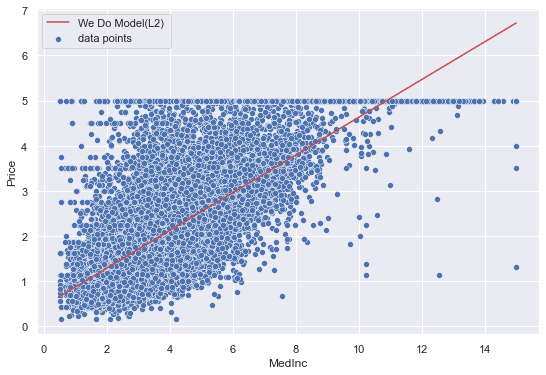

In [225]:
sns.scatterplot(x=x, y=y, label='data points')
sns.lineplot(x=x, y=new_beta[0] + new_beta[1] * x, label='We Do Model(L2) ', color = 'r')
plt.show()

## You Do Model

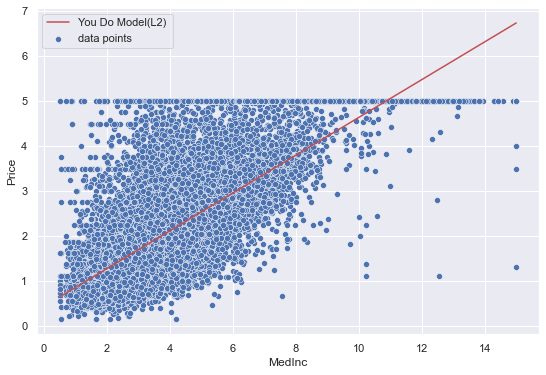

In [227]:
sns.scatterplot(x=x, y=y, label='data points')
sns.lineplot(x=x, y=beta[0] + beta[1] * x, label='You Do Model(L2) ', color = 'r')
plt.show()